In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import requests
import urllib.request
from bs4 import BeautifulSoup
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import warnings
from sklearn import metrics

warnings.filterwarnings('ignore')


from sklearn import model_selection
from sklearn.model_selection import cross_val_score


In [2]:
def pythag(pf,pa,exp=11.5):
    return (pf**exp)/(pa**exp+pf**exp)

def pythagGame(df_game,exp=11.5):
    p={}
    for iteam in np.arange(1,3):
        pf = df_game['AdjO_'+str(iteam)]
        pa = df_game['AdjD_'+str(iteam)]
        p[str(iteam)] = pythag(pf,pa,exp)
    
    return p['1']*(1.-p['2'])/(p['1']+p['2']-2.*p['1']*p['2'])
    

In [3]:
teamType=pd.read_csv('data/team_type.csv')
teamTypeDict={}
for r in teamType.values:
    teamTypeDict[r[0]]=r[1]

In [4]:
df=pd.read_csv('data/games/all_games_2017.csv',index_col=0)
# df=pd.read_csv('data/games/tourn_games_2016.csv',index_col=0)
# y=df['outcome']
dropLabels=['School_1','Conf_1','wpct_1','Rank_1','WL_1','sched_url_1', 'name_1',\
            'School_2','Conf_2','wpct_2','Rank_2','WL_2','sched_url_2', 'name_2', 'outcome']

y=df['outcome']


In [5]:
types=[]
for r in df.itertuples():
    
    t1=teamTypeDict[r.School_1]
    t2=teamTypeDict[r.School_2]
    
    types.append(str(min(t1,t2))+str(max(t1,t2)))
    
df['types']=types

In [7]:
res=[]
dfAll=pd.DataFrame()
for year in np.arange(2017,2003,-1):
    df=pd.read_csv('data/games/tourn_games_'+str(year)+'.csv',index_col=0)
    dfAll=dfAll.append(df,ignore_index=True)


In [11]:
dropLabels=['School_1','Conf_1','wpct_1','Rank_1','WL_1','sched_url_1', 'name_1',\
            'School_2','Conf_2','wpct_2','Rank_2','WL_2','sched_url_2', 'name_2', 'outcome', 'region']
dropLabels.append('round')

In [50]:
X=dfAll.drop(dropLabels,axis=1).dropna(axis=1)
y=dfAll['outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
# model = LogisticRegression(C=0.001,multi_class='multinomial',solver='sag')
model = LogisticRegression(C=0.001)
# model=RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
model.fit(X_train, y_train)

y_pred=model.predict(X_test)

kfold = model_selection.KFold(n_splits=5, random_state=0)
scoring = 'accuracy'
results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean())) 

y_predPythag=pythagGame(X_test)

print('Accuracy using pythagorean win expectation: %.3f' % ((np.round(y_predPythag)==y_test).sum()/len(y_test)))

res.append([year,results.mean(),(np.round(y_predPythag)==y_test).sum()/len(y_test)])


10-fold cross validation average accuracy: 0.839
Accuracy using pythagorean win expectation: 0.733


In [51]:
X_test.values.shape

(221, 44)

In [49]:
def logit(x):
    return 1./(1.+np.exp(-x))
logit(X_test.dot(model.coef_.T)).values-model.predict_proba(X_test)[:,1,None]

array([[  1.75662122e-05],
       [  1.30242487e-05],
       [  1.82790561e-05],
       [  7.36844603e-06],
       [  1.28372954e-05],
       [  1.58261539e-05],
       [  1.54875395e-05],
       [  3.80490767e-06],
       [  1.96280284e-05],
       [  6.80287069e-06],
       [  6.13525201e-07],
       [  1.92596776e-05],
       [  1.94567205e-05],
       [  1.34820584e-05],
       [  1.96224848e-05],
       [  1.94388599e-05],
       [  1.96022060e-05],
       [  9.50411855e-06],
       [  1.15587826e-06],
       [  5.49725060e-06],
       [  5.32529601e-06],
       [  1.62985769e-05],
       [  1.96847116e-07],
       [  1.66791097e-05],
       [  6.70547615e-06],
       [  1.78087547e-05],
       [  4.67560823e-06],
       [  9.20250151e-06],
       [  1.92078993e-05],
       [  1.65670761e-05],
       [  1.96689697e-05],
       [  2.29510627e-07],
       [  2.78670419e-06],
       [  1.81252777e-05],
       [  1.36513567e-05],
       [  1.88587331e-05],
       [  1.93750864e-05],
 

In [22]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0])

In [14]:
np.append(y_pred[:,None],model.predict_proba(X_test),axis=1)

array([[ 1.        ,  0.33573159,  0.66426841],
       [ 1.        ,  0.20906013,  0.79093987],
       [ 1.        ,  0.3660799 ,  0.6339201 ],
       [ 1.        ,  0.10446177,  0.89553823],
       [ 1.        ,  0.20500935,  0.79499065],
       [ 1.        ,  0.27847231,  0.72152769],
       [ 1.        ,  0.26897328,  0.73102672],
       [ 0.        ,  0.94910606,  0.05089394],
       [ 0.        ,  0.52848918,  0.47151082],
       [ 1.        ,  0.09548677,  0.90451323],
       [ 1.        ,  0.00785099,  0.99214901],
       [ 0.        ,  0.57408727,  0.42591273],
       [ 1.        ,  0.44536611,  0.55463389],
       [ 0.        ,  0.78078716,  0.21921284],
       [ 0.        ,  0.52969911,  0.47030089],
       [ 0.        ,  0.5566902 ,  0.4433098 ],
       [ 1.        ,  0.46626213,  0.53373787],
       [ 0.        ,  0.85964323,  0.14035677],
       [ 1.        ,  0.01489701,  0.98510299],
       [ 1.        ,  0.0754921 ,  0.9245079 ],
       [ 0.        ,  0.92707684,  0.072

In [15]:
dfAll[dfAll['round']==1][['School_1','School_2','wpct_1','wpct_2','outcome']]

,School_1,School_2,wpct_1,wpct_2,outcome
0,villanova,mount-st.-mary's,0.889,0.556,1
1,wisconsin,virginia-tech,0.730,0.667,1
2,virginia,north-carolina-wilmington,0.676,0.829,1
3,florida,east-tennessee-state,0.750,0.771,1
4,southern-methodist,southern-california,0.857,0.722,0
5,baylor,new-mexico-state,0.771,0.824,1
6,south-carolina,marquette,0.703,0.594,1
7,duke,troy,0.757,0.595,1
15,kansas,uc-davis,0.861,0.639,1
16,miami-(fl),michigan-state,0.636,0.571,0


In [160]:
confusion_matrix(y_test,np.round(y_predPythag))

array([[ 43,  37],
       [ 22, 119]])

In [159]:
1-(22+43)/(37+119.+22+43)

0.7058823529411764

In [157]:
1-(18+23)/(57+123.+18+23)

0.8144796380090498

In [110]:
resDF.mean()

Year       2010.500000
Log reg       0.743571
Pythag        0.721805
dtype: float64

In [93]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[ 2,  3],
       [ 2, 12]])

In [42]:
rf=RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
rf.fit(X_train,y_train)
pred=rf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.73684210526315785

(0, 1)

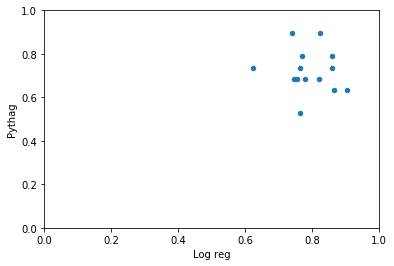

In [43]:
resDF.plot(x='Log reg',y='Pythag',kind='scatter')
plt.xlim(0,1)
plt.ylim(0,1)

In [107]:
resultList=[]
for yr in np.arange(2017,2003,-1):
    year=str(yr)
    teamType=pd.read_csv('data/team_type_'+year+'.csv')
    teamTypeDict={}
    for r in teamType.values:
        teamTypeDict[r[0]]=r[1]

    df=pd.read_csv('data/games/all_games_'+year+'.csv',index_col=0).dropna(axis=1)
    # df=pd.read_csv('data/games/tourn_games_2016.csv',index_col=0)
    # y=df['outcome']
    dropLabels=['School_1','Conf_1','wpct_1','Rank_1','WL_1','sched_url_1',\
                'School_2','Conf_2','wpct_2','Rank_2','WL_2','sched_url_2', 'outcome']

    y=df['outcome']


    types=[]
    for r in df.itertuples():

        t1=teamTypeDict[r.School_1]
        t2=teamTypeDict[r.School_2]

        types.append(str(min(t1,t2))+str(max(t1,t2)))

    df['types']=types

    runsum=0
    numsum=0
    pythsum=0

    nlab=3
    for t1lab in range(nlab):
        for t2lab in np.arange(t1lab,nlab):
            lab = str(t1lab)+str(t2lab)

            dfSel = df[(df.types==lab)]
            dropLabels.append('types')

            X=dfSel.drop(dropLabels,axis=1)
            y=dfSel['outcome']


            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
            logreg = LogisticRegression()
            logreg.fit(X_train, y_train)

            y_pred=logreg.predict(X_test)
            print(lab,len(y_pred))
            print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))


            y_predPythag=pythagGame(X_test)

            print('Accuracy using pythagorean win expectation: ',(np.round(y_predPythag)==y_test).sum()/len(y_test))


            kfold = model_selection.KFold(n_splits=10, random_state=7)
            modelCV = LogisticRegression()
            scoring = 'accuracy'
            results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
            print("10-fold cross validation average accuracy: %.3f" % (results.mean()))    

            runsum+= len(y_pred) * results.mean() #logreg.score(X_test, y_test)
            numsum+= len(y_pred)
            pythsum+= len(y_pred) *(np.round(y_predPythag)==y_test).sum()/len(y_test)



    print ()
    print (runsum/numsum)
    print (pythsum/numsum)
    
    resultList.append([year,(runsum/numsum),pythsum/numsum])
    
resDFKM=pd.DataFrame(resultList,columns=['year','Log reg','Pythag'])


00 613
Accuracy of logistic regression classifier on test set: 0.67
Accuracy using pythagorean win expectation:  0.68515497553
10-fold cross validation average accuracy: 0.669
01 281
Accuracy of logistic regression classifier on test set: 0.84
Accuracy using pythagorean win expectation:  0.79359430605
10-fold cross validation average accuracy: 0.830
02 940
Accuracy of logistic regression classifier on test set: 0.77
Accuracy using pythagorean win expectation:  0.76170212766
10-fold cross validation average accuracy: 0.754
11 388
Accuracy of logistic regression classifier on test set: 0.65
Accuracy using pythagorean win expectation:  0.682989690722
10-fold cross validation average accuracy: 0.669
12 287
Accuracy of logistic regression classifier on test set: 0.92
Accuracy using pythagorean win expectation:  0.91637630662
10-fold cross validation average accuracy: 0.922
22 530
Accuracy of logistic regression classifier on test set: 0.70
Accuracy using pythagorean win expectation:  0.6943

10-fold cross validation average accuracy: 0.627
12 638
Accuracy of logistic regression classifier on test set: 0.82
Accuracy using pythagorean win expectation:  0.815047021944
10-fold cross validation average accuracy: 0.799
22 674
Accuracy of logistic regression classifier on test set: 0.68
Accuracy using pythagorean win expectation:  0.695845697329
10-fold cross validation average accuracy: 0.650

0.734948243054
0.771009174312
00 612
Accuracy of logistic regression classifier on test set: 0.64
Accuracy using pythagorean win expectation:  0.62091503268
10-fold cross validation average accuracy: 0.644
01 431
Accuracy of logistic regression classifier on test set: 0.88
Accuracy using pythagorean win expectation:  0.867749419954
10-fold cross validation average accuracy: 0.845
02 646
Accuracy of logistic regression classifier on test set: 0.77
Accuracy using pythagorean win expectation:  0.78173374613
10-fold cross validation average accuracy: 0.764
11 406
Accuracy of logistic regressio

In [109]:
resDFKM.mean()

year       1.440858e+54
Log reg    7.391709e-01
Pythag     7.464952e-01
dtype: float64

In [116]:

kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.578


In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
# logreg = LogisticRegression(C=1,penalty='l1',tol=0.1)
logreg.fit(X_train, y_train)
y_pred=logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))


Accuracy of logistic regression classifier on test set: 0.70


In [11]:
df['pythag']=pythagGame(df)

In [15]:
y_predPythag=pythagGame(X_test)

print('Accuracy using pythagorean win expectation: ',(np.round(y_predPythag)==y_test).sum()/len(y_test))
# print(len(y_test))

Accuracy using pythagorean win expectation:  0.739459815547
